In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
df=pd.read_csv('C:\\Users\\hp\\Documents\\Python\\train.csv')
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
df.shape

(42000, 785)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

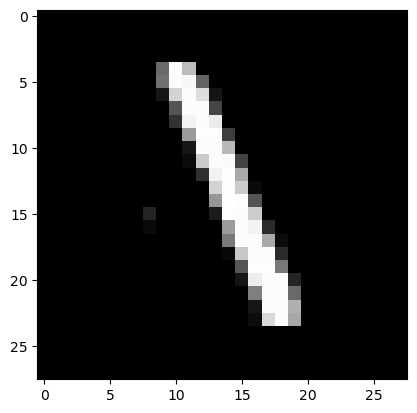

In [13]:

plt.imshow(df.iloc[13150,1:].values.reshape(28,28),cmap='gray')
plt.show()

In [10]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
km=KNeighborsClassifier()
km.fit(X_train,y_train)
y_pred=km.predict(X_test)


In [17]:
import time
start=time.time()
y_pred=km.predict(X_test)
print(time.time()-start)

11.052068710327148


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9648809523809524


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [21]:
X_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [23]:
X_pca.shape

(33600, 784)

In [24]:
km=KNeighborsClassifier()
km.fit(X_pca,y_train)

KNeighborsClassifier()

In [28]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X_train_scaled)
    X_test_pca=pca.transform(X_test_scaled)
    km=KNeighborsClassifier()
    km.fit(X_pca,y_train)
    start=time.time()
    y_pred=km.predict(X_test_pca)
    end=time.time()
    acc=accuracy_score(y_test,y_pred)
    print(f'Components:{i}, Accuracy:{acc}, Time:{end-start}')

Components:1, Accuracy:0.2580952380952381, Time:0.17350149154663086
Components:2, Accuracy:0.3236904761904762, Time:0.16184234619140625
Components:3, Accuracy:0.5104761904761905, Time:0.2213127613067627
Components:4, Accuracy:0.6663095238095238, Time:0.19954252243041992
Components:5, Accuracy:0.7378571428571429, Time:0.2758207321166992
Components:6, Accuracy:0.8227380952380953, Time:0.3180267810821533
Components:7, Accuracy:0.8436904761904762, Time:0.40391969680786133
Components:8, Accuracy:0.8721428571428571, Time:0.47496461868286133
Components:9, Accuracy:0.886547619047619, Time:0.628392219543457
Components:10, Accuracy:0.9055952380952381, Time:1.0519688129425049
Components:11, Accuracy:0.9116666666666666, Time:0.8358876705169678
Components:12, Accuracy:0.9184523809523809, Time:1.4531617164611816
Components:13, Accuracy:0.9276190476190476, Time:1.5190000534057617
Components:14, Accuracy:0.9351190476190476, Time:1.2874670028686523
Components:15, Accuracy:0.9384523809523809, Time:1.844

KeyboardInterrupt: 

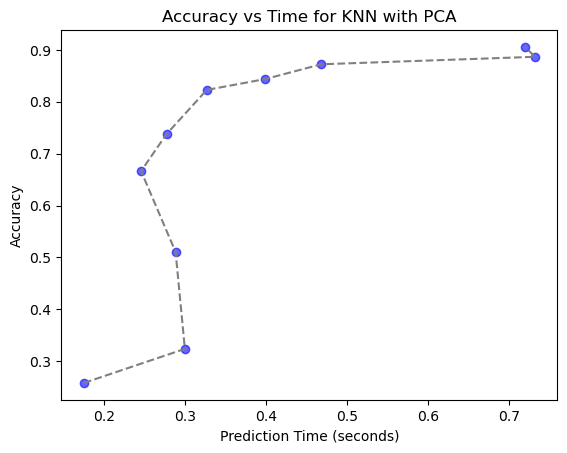

Components:10, Accuracy:0.9055952380952381, Time:0.720313549041748


In [ ]:
from IPython.display import clear_output
accuracies = []

times = []
for i in range(1,785):
    clear_output(wait=True)
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X_train_scaled)
    X_test_pca=pca.transform(X_test_scaled)
    km=KNeighborsClassifier()
    km.fit(X_pca,y_train)
    start=time.time()
    y_pred=km.predict(X_test_pca)
    end=time.time()
    acc=accuracy_score(y_test,y_pred)
    accuracies.append(acc)
    times.append(end - start)
    plt.scatter(times, accuracies, c='blue', alpha=0.6)
    plt.plot(times, accuracies, linestyle='--', color='gray')
    plt.xlabel("Prediction Time (seconds)")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Time for KNN with PCA")
    plt.show()
    print(f'Components:{i}, Accuracy:{acc}, Time:{end-start}')